# Linear Regression Example

Linear regression implementation with TensorFlow v2 library.

This example is using a low-level approach to better understand all mechanics behind the training process.

- Author: Aymeric Damien
- Project: https://github.com/aymericdamien/TensorFlow-Examples/

In [11]:
from __future__ import absolute_import, division, print_function

In [12]:
import tensorflow as tf
import numpy as np
from matplotlib import pyplot as plt
rng = np.random

In [18]:
print(rng)

<module 'numpy.random' from 'c:\\Users\\erkun\\anaconda3\\envs\\tf\\lib\\site-packages\\numpy\\random\\__init__.py'>


In [19]:
rng.randn()

-0.23384031383954343

In [14]:
# Parameters.
learning_rate = 0.01
training_steps = 1000
display_step = 50

In [15]:
# Training Data.
X = np.array([3.3,4.4,5.5,6.71,6.93,4.168,9.779,6.182,7.59,2.167,
              7.042,10.791,5.313,7.997,5.654,9.27,3.1])
Y = np.array([1.7,2.76,2.09,3.19,1.694,1.573,3.366,2.596,2.53,1.221,
              2.827,3.465,1.65,2.904,2.42,2.94,1.3])


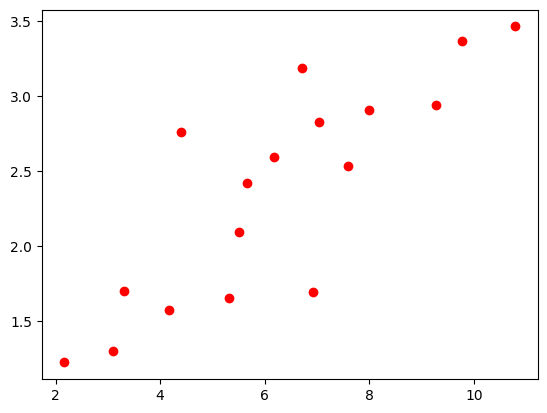

In [25]:
%matplotlib inline
plt.plot(X,Y,'ro', label='Original data')
plt.show()

In [20]:
# Weight and Bias, initialized randomly.
W = tf.Variable(rng.randn(), name="weight")
b = tf.Variable(rng.randn(), name="bias")

# Linear regression (Wx + b).
def linear_regression(x):
    return W * x + b

# Mean square error.
def mean_square(y_pred, y_true):
    return tf.reduce_mean(tf.square(y_pred - y_true))

# Stochastic Gradient Descent Optimizer.
optimizer = tf.optimizers.SGD(learning_rate)

In [21]:
# Optimization process. 
def run_optimization():
    # Wrap computation inside a GradientTape for automatic differentiation.
    with tf.GradientTape() as g:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)

    # Compute gradients.
    gradients = g.gradient(loss, [W, b])
    
    # Update W and b following gradients.
    optimizer.apply_gradients(zip(gradients, [W, b]))

In [22]:
# Run training for the given number of steps.
for step in range(1, training_steps + 1):
    # Run the optimization to update W and b values.
    run_optimization()
    
    if step % display_step == 0:
        pred = linear_regression(X)
        loss = mean_square(pred, Y)
        print("step: %i, loss: %f, W: %f, b: %f" % (step, loss, W.numpy(), b.numpy()))

step: 50, loss: 0.154293, W: 0.259996, b: 0.739525
step: 100, loss: 0.154199, W: 0.259039, b: 0.746309
step: 150, loss: 0.154125, W: 0.258192, b: 0.752316
step: 200, loss: 0.154067, W: 0.257442, b: 0.757635
step: 250, loss: 0.154022, W: 0.256777, b: 0.762346
step: 300, loss: 0.153987, W: 0.256189, b: 0.766518
step: 350, loss: 0.153959, W: 0.255668, b: 0.770212
step: 400, loss: 0.153937, W: 0.255206, b: 0.773484
step: 450, loss: 0.153920, W: 0.254797, b: 0.776381
step: 500, loss: 0.153906, W: 0.254435, b: 0.778947
step: 550, loss: 0.153896, W: 0.254115, b: 0.781219
step: 600, loss: 0.153888, W: 0.253831, b: 0.783231
step: 650, loss: 0.153881, W: 0.253580, b: 0.785013
step: 700, loss: 0.153876, W: 0.253357, b: 0.786591
step: 750, loss: 0.153872, W: 0.253160, b: 0.787988
step: 800, loss: 0.153869, W: 0.252986, b: 0.789225
step: 850, loss: 0.153867, W: 0.252831, b: 0.790321
step: 900, loss: 0.153865, W: 0.252694, b: 0.791292
step: 950, loss: 0.153863, W: 0.252573, b: 0.792151
step: 1000, l

In [23]:
import matplotlib.pyplot as plt

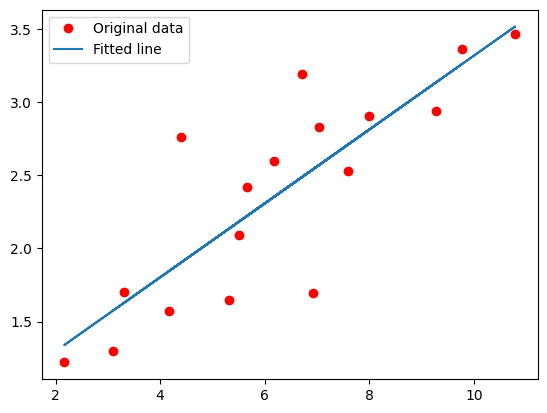

In [24]:
# Graphic display
plt.plot(X, Y, 'ro', label='Original data')
plt.plot(X, np.array(W * X + b), label='Fitted line')
plt.legend()
plt.show()